In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
df = pd.read_csv("Life Expectancy Data.csv")

In [5]:
df = df.rename(columns=lambda x: x.strip())
df = df.dropna()
df.head()

Country  Year      Status  Life expectancy  Adult Mortality  \
0  Afghanistan  2015  Developing             65.0            263.0   
1  Afghanistan  2014  Developing             59.9            271.0   
2  Afghanistan  2013  Developing             59.9            268.0   
3  Afghanistan  2012  Developing             59.5            272.0   
4  Afghanistan  2011  Developing             59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles  ...  \
0             62     0.01               71.279624         65.0     1154  ...   
1             64     0.01               73.523582         62.0      492  ...   
2             66     0.01               73.219243         64.0      430  ...   
3             69     0.01               78.184215         67.0     2787  ...   
4             71     0.01                7.097109         68.0     3013  ...   

   Polio  Total expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0    6.0               8.16        65.0       0.1  584.259210  33736494.0   
1   58.0               8.18        62.0       0.1  612.696514    327582.0   
2   62.0               8.13        64.0       0.1  631.744976  31731688.0   
3   67.0               8.52        67.0       0.1  669.959000   3696958.0   
4   68.0               7.87        68.0       0.1   63.537231   2978599.0   

   thinness  1-19 years  thinness 5-9 years  Income composition of resources  \
0                  17.2                17.3                            0.479   
1                  17.5                17.5                            0.476   
2                  17.7                17.7                            0.470   
3                  17.9                18.0                            0.463   
4                  18.2                18.2                            0.454   

   Schooling  
0       10.1  
1       10.0  
2        9.9  
3        9.8  
4        9.5  

[5 rows x 22 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   object 
 3   Life expectancy                  1649 non-null   float64
 4   Adult Mortality                  1649 non-null   float64
 5   infant deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   percentage expenditure           1649 non-null   float64
 8   Hepatitis B                      1649 non-null   float64
 9   Measles                          1649 non-null   int64  
 10  BMI                              1649 non-null   float64
 11  under-five deaths                1649 non-null   int64  
 12  Polio               

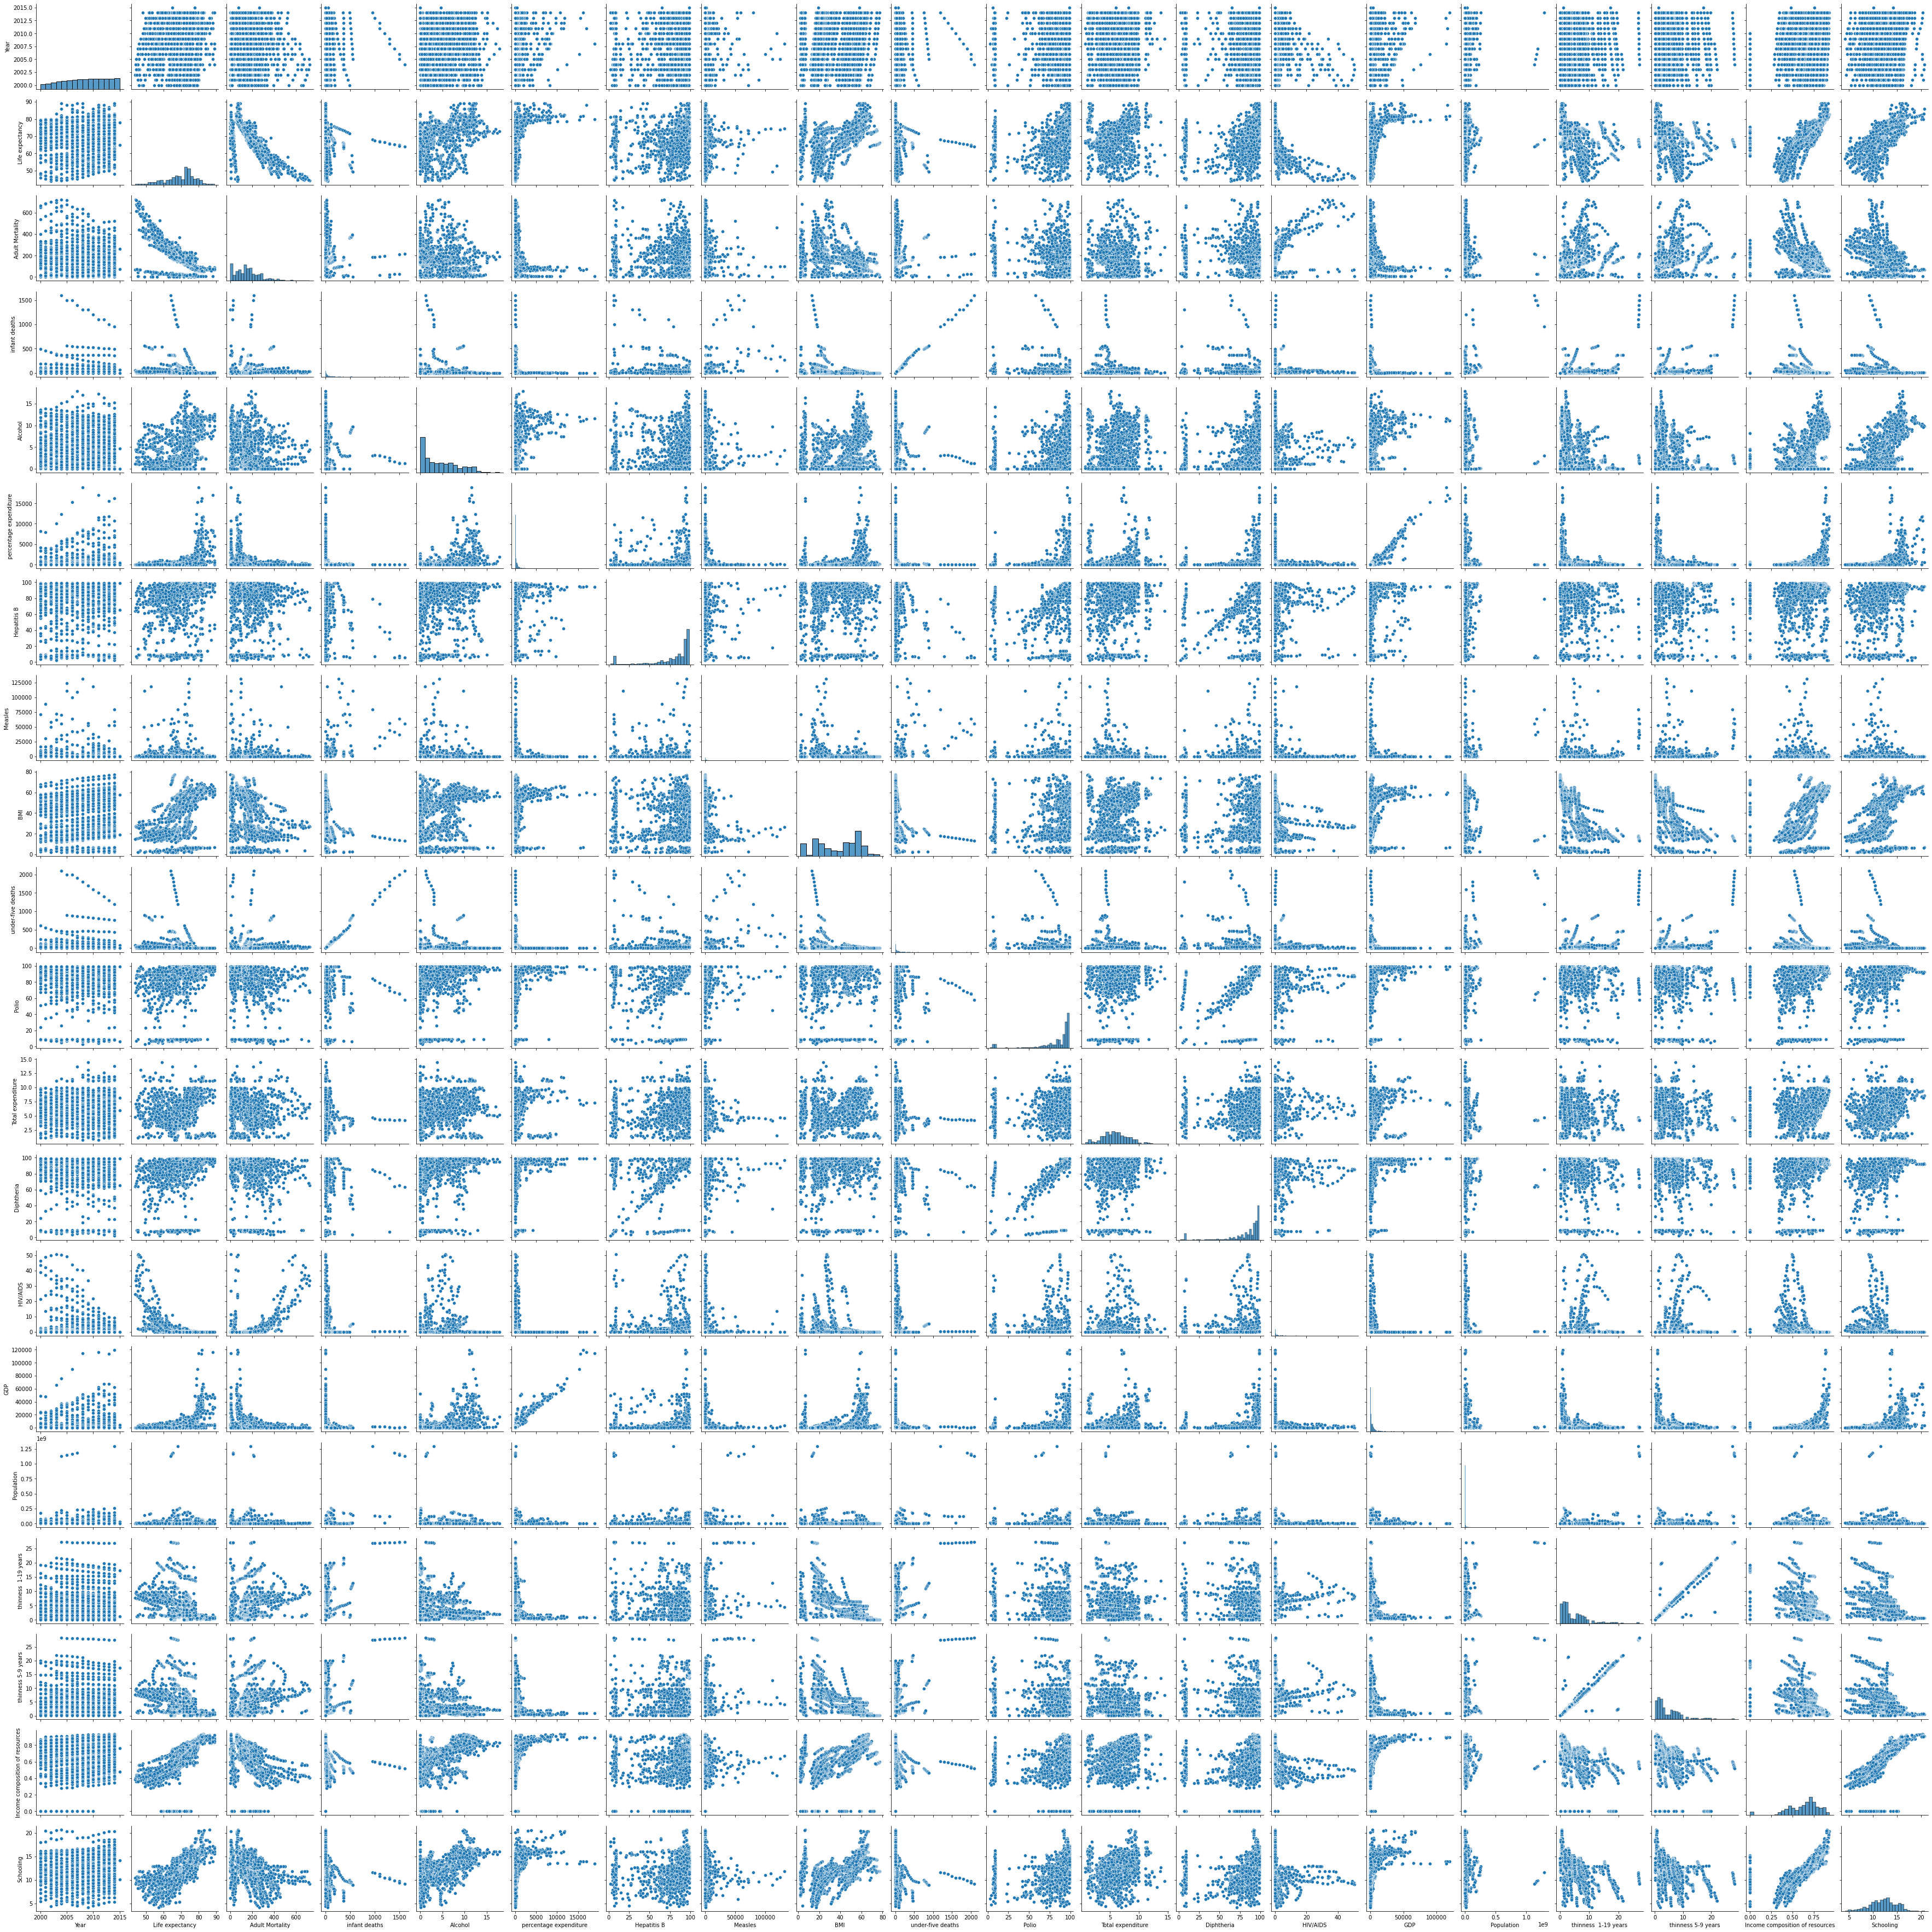

In [7]:
sns.pairplot(df)

C:\Users\nivet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income composition of resources', ylabel='Life expectancy'>

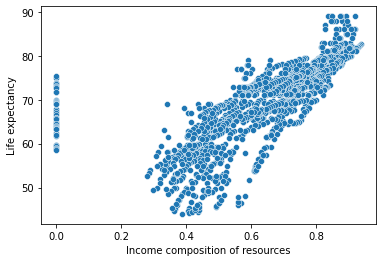

In [8]:
sns.scatterplot(df["Income composition of resources"], df["Life expectancy"])

In [9]:
df2 = df[['Income composition of resources','Life expectancy']]
df2.rename(columns = {'Income composition of resources':'incomeHDI'}, inplace = True)

C:\Users\nivet\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [10]:
train_df = df2.sample(frac=0.8, random_state=0)
test_df = df2.drop(train_df.index)

In [11]:
df2

incomeHDI  Life expectancy
0         0.479             65.0
1         0.476             59.9
2         0.470             59.9
3         0.463             59.5
4         0.454             59.2
...         ...              ...
2933      0.407             44.3
2934      0.418             44.5
2935      0.427             44.8
2936      0.427             45.3
2937      0.434             46.0

[1649 rows x 2 columns]

In [12]:
train_features = train_df.copy()
test_features = test_df.copy()

train_labels = train_features.pop("Life expectancy")
test_labels = test_features.pop("Life expectancy")

In [13]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [14]:
normalizer.adapt((train_features))

In [15]:
print(normalizer.mean.numpy())

[[0.6324905]]


In [16]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[0.65]]

Normalized: [[0.08]]


In [17]:
sch = np.array(train_features['incomeHDI'])

sch_normalizer = layers.Normalization(input_shape=[1,], axis=None)
sch_normalizer.adapt(sch)

In [18]:
sch_model = tf.keras.Sequential([
    sch_normalizer,
    layers.Dense(units=1)
])

sch_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [19]:
sch_model.predict(sch[:10])

array([[-0.08466662],
       [-1.5637226 ],
       [-0.6675149 ],
       [ 1.0559615 ],
       [-0.08466662],
       [-1.6953332 ],
       [ 1.8832301 ],
       [ 1.3442519 ],
       [ 1.2063739 ],
       [-0.80539274]], dtype=float32)

In [20]:
sch_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [21]:
history = sch_model.fit(
    train_features['incomeHDI'],
    train_labels,
    epochs=40,
    verbose=0,
    validation_split = 0.2)

In [25]:
hist = pd.DataFrame(history.history)
hist.head()
hist['epoch'] = history.epoch
hist.tail()

loss  val_loss  epoch
35  3.773669  4.370740     35
36  3.774500  4.381190     36
37  3.773426  4.371819     37
38  3.774044  4.365242     38
39  3.778401  4.399747     39

In [23]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 100])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

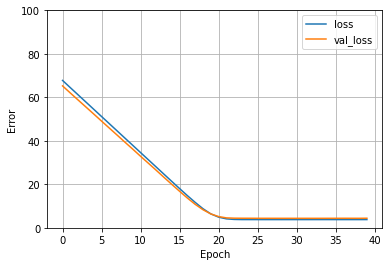

In [24]:
plot_loss(history)

In [200]:
test_results = {}

test_results['sch_model'] = sch_model.evaluate(
    test_features['incomeHDI'],
    test_labels, verbose=0)

In [201]:
x = tf.linspace(0.0, 250, 251)
y = sch_model.predict(x)

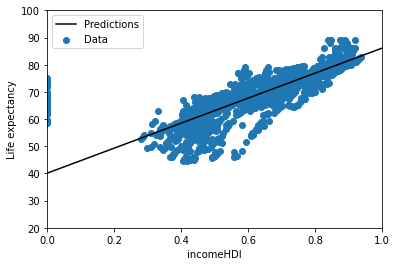

In [202]:
plt.scatter(train_features['incomeHDI'], train_labels, label='Data')
plt.plot(x, y, color='k', label='Predictions')
plt.xlim(0,1)
plt.ylim(20,100)
plt.xlabel('incomeHDI')
plt.ylabel('Life expectancy')
plt.legend()